In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import re
import string
import urllib
import gzip
import time
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from collections import Counter

from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, Flatten, MaxPool1D, GlobalMaxPooling1D, Bidirectional
from keras.layers.merge import concatenate
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Gathering

In [3]:
real_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Getting Real about Fake News_Kaggle/real.csv")
real_news.head()

,Unnamed: 0,Unnamed: 0.1,id,title,publication,author,date,year,month,url,content
0,0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
2,9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
3,2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
4,2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...


In [4]:
fake_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Getting Real about Fake News_Kaggle/fake.csv")
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [5]:
# essential columns
fake_news1 = fake_news[['title', 'text','language','site_url']]
fake_news1 = fake_news1[fake_news1.language == 'english']
fake_news1['title'].fillna(value="", inplace=True)

# drop null 'text' rows as there is no context of the article
fake_news1.dropna(axis=0, inplace=True, subset=['text'])

# data shuffling and resetting index to avoid bias
fake_news1 = fake_news1.sample(frac=1.0) 
fake_news1.reset_index(drop=True,inplace=True)
fake_news1.head()

,title,text,language,site_url
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,english,theonion.com
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,english,endingthefed.com
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",english,guardianlv.com
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",english,opednews.com
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",english,ihavethetruth.com


In [6]:
#feature extraction
fake_news2 = fake_news1[['title', 'text','site_url']]

#data labelling
fake_news2['label'] = 'fake'
fake_news2.head()

,title,text,site_url,label
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,theonion.com,fake
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,endingthefed.com,fake
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",guardianlv.com,fake
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",opednews.com,fake
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",ihavethetruth.com,fake


In [7]:
#all site_urls
site_urls = fake_news2['site_url']

#removing domain extensions
site_urls2 = [x.split('.',1)[0] for x in site_urls]

#replacing the old site_url column with these values
fake_news2['site_url'] = site_urls2
fake_news2.head()

,title,text,site_url,label
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,theonion,fake
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,endingthefed,fake
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",guardianlv,fake
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",opednews,fake
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",ihavethetruth,fake


In [8]:
#feature extraction
real_news2 = real_news[['title', 'content', 'publication']]

#data labelling
real_news2['label'] = 'real'
real_news2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


In [9]:
#rename features in our final datasets
newlabels = ['title', 'content', 'publication', 'label']
real_news2.columns = newlabels
fake_news2.columns = newlabels

In [10]:
fake_news2.head()

,title,content,publication,label
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,theonion,fake
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,endingthefed,fake
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",guardianlv,fake
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",opednews,fake
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",ihavethetruth,fake


In [11]:
real_news2.head()

,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


#Data Concatenation

In [12]:
#dataframe combined to form a new final Fake News Detection dataset
dataframes = [fake_news2, real_news2]
final_dataset = pd.concat(dataframes)
final_dataset

,title,content,publication,label
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,theonion,fake
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,endingthefed,fake
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",guardianlv,fake
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",opednews,fake
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",ihavethetruth,fake
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [13]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28069 entries, 0 to 15711
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        28069 non-null  object
 1   content      28069 non-null  object
 2   publication  28069 non-null  object
 3   label        28069 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [14]:
final_dataset['label'] = final_dataset['label'].map({'real': 1, 'fake': 0})
final_dataset

,title,content,publication,label
0,Nurse Reminds Elderly Man She’s Just Down The ...,New Heavy-Duty Voting Machine Allows Americans...,theonion,0
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,endingthefed,0
2,Todd Kohlhepp Confesses to Superbike Motorspor...,"It’s Wednesday, the trash people picked up my ...",guardianlv,0
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,"License DMCA Ryan, Obama, McConnell, Reid, Pel...",opednews,0
4,The OTHER Clinton FBI Investigation That Hilla...,"0 comments In many ways, this SCANDALOUS inves...",ihavethetruth,0
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,1
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,1
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,1
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,1


#Data Pre-Processing

In [15]:
final_dataset['content'] = final_dataset['title'] + " " + final_dataset['content']

In [16]:
def preprocess_text(df, remove_special=True):
    texts = df['content'].copy()
    labels = df['label'].copy()

    #Remove links 
    df["content"] = df["content"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the End Of Sentence characters
    df["content"] = df["content"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["content"] = df["content"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["content"] = df["content"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
        
    #Strip Punctation
    df["content"] = df["content"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["content"] = df["content"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["content"] = df["content"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert content to lowercase
    df["content"] = df["content"].apply(lambda x: x.lower())
        
    #Remove multiple letter repeating words
    df["content"] = df["content"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["content"] = df["content"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["content"] = df["content"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
    
    return df

#Preprocessing of entered Text
final_dataset = preprocess_text(final_dataset)

In [17]:
#Remove posts with less than X words
min_words = 15
print("Before : Number of posts", len(final_dataset)) 
final_dataset["no. of. words"] = final_dataset["content"].apply(lambda x: len(re.findall(r'\w+', x)))
final_dataset = final_dataset[final_dataset["no. of. words"] >= min_words]
print("After : Number of posts", len(final_dataset))
final_dataset

Before : Number of posts 28069
After : Number of posts 27472


,title,content,publication,label,no. of. words
0,Nurse Reminds Elderly Man She’s Just Down The ...,nurse reminds elderly shes just down hall ...,theonion,0,213
1,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,unauthorized video hillary huma leaks watch...,endingthefed,0,122
2,Todd Kohlhepp Confesses to Superbike Motorspor...,todd kohlhepp confesses superbike motorsports...,guardianlv,0,554
3,Paul Ryan: He's the Fiscal Policy Illiterate i...,paul ryan fiscal policy illiterate conggre...,opednews,0,588
4,The OTHER Clinton FBI Investigation That Hilla...,other clinton investigation that hillary doe...,ihavethetruth,0,301
...,...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,eavesdropping uber driver saved yearold pass...,Washington Post,1,523
15708,Plane carrying six people returning from a Cav...,plane carrying people returning from cavalie...,Washington Post,1,419
15709,After helping a fraction of homeowners expecte...,after helping fraction homeowners expected o...,Washington Post,1,782
15710,"Yes, this is real: Michigan just banned bannin...",this real michigan just banned banning plast...,Washington Post,1,458


Feature Splitting

In [18]:
## Get the Independent Features
X=final_dataset.drop('label',axis=1)

In [19]:
## Get the Dependent features
y=final_dataset['label']

In [20]:
print(X.shape)
print(y.shape)

(27472, 4)
(27472,)


In [21]:
messages=X.copy()

In [22]:
messages['title'][1]

1    UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...
1    First, a Mixtape. Then a Romance. - The New Yo...
Name: title, dtype: object

As we dropped nan values, we see because of concatenation, 1 rows have same indices. So we reset index

In [23]:
messages.reset_index(inplace=True)

In [24]:
#Stemming & STop words removal
ps = PorterStemmer()
corpus = []
#for loop runs through all the posts 1 at a time, review has list of words in each sentence
for i in range(0, len(messages)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['content'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus[:2]

['nurs remind elderli she hall start onion america finest news sourc heavyduti vote machin allow american take frustrat cast ballot washingtonsay circumst year presidenti race made upgrad necessari elect commiss throughout countri reportedli work instal heavyduti vote machin week allow american physic take frustrat devic cast vote eostokendot grate live societi mattress disappear left sidewalk coupl day columbu ohemphas impress feat taken grant local nathan montgomeri told report wednesday incred grate live societi mattress disappear left outsid sidewalk coupl day eostokendot clinton staff readi launch disabl nation electron devic yorkin effort prepar revel might emerg email tenur secretari state democrat presidenti nomine hillari clinton reportedli told staff tuesday readi launch sever electromagnet puls disabl nation electron devic eostokendot produc decor gift thin lexington maconjur item exist along sever sheet perfectli coordin tissu paper local mother carolin wolfson reportedli p

#One Hot Representation

In [26]:
### Vocabulary size 
voc_size=10000

Convert SENTENCES into One-Hot code, given - a vocabulary size

In [27]:
onehot_rep=[one_hot(words,voc_size)for words in corpus] 
onehot_rep[:2]

[[6638,
  2419,
  2711,
  9778,
  1711,
  511,
  3689,
  5225,
  7023,
  4066,
  6239,
  8724,
  3058,
  2916,
  3242,
  1457,
  6182,
  3750,
  3308,
  2053,
  4112,
  2998,
  1174,
  5074,
  1819,
  6435,
  8203,
  5505,
  9966,
  178,
  1383,
  3184,
  1880,
  279,
  8906,
  8724,
  3058,
  2916,
  7723,
  3242,
  1457,
  1589,
  6182,
  3750,
  8025,
  3308,
  3058,
  318,
  6026,
  3376,
  4533,
  5912,
  9330,
  7198,
  6046,
  3399,
  5707,
  3433,
  7041,
  539,
  7611,
  3149,
  8809,
  2038,
  8316,
  9887,
  6188,
  9072,
  2160,
  3923,
  6026,
  3376,
  4533,
  5912,
  9330,
  7198,
  5072,
  6046,
  3399,
  5707,
  318,
  632,
  6739,
  9009,
  3333,
  6626,
  8283,
  3776,
  8025,
  9024,
  5883,
  916,
  7870,
  7777,
  7714,
  6758,
  1089,
  2170,
  4416,
  2862,
  5074,
  745,
  9909,
  632,
  1880,
  6188,
  6739,
  2182,
  9009,
  3333,
  2968,
  7574,
  5268,
  6626,
  8283,
  3776,
  8025,
  318,
  4485,
  2744,
  9247,
  777,
  2117,
  9031,
  2986,
  591,
  544

#DL Model: LSTM

Word Embedding - Pad Sequencing - to make all sentences of equal length. For this we require 1 hot representation (done above)

In [28]:
sent_length=1500
#pre - add 0 before those sentences that are < 1500 words
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs[:2])

[[   0    0    0 ...  632 4459  318]
 [   0    0    0 ...  318  318  318]]


In [29]:
#embedded_docs[0]

In [30]:
#Creating the Model
#embedding - takes input & converts them into certain no. of features - based on this no. that it gives output
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))

#Dropout not added yet
model.add(LSTM(units=100))

#Dense layer added as it is a classification problem - 1 final output in the end
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 100)         1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(27472, (27472,))

In [32]:
#embedded_docs has all the Independent features - convert it back to an array : 
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((27472, 1500), (27472,))

#67-33 Train Test Split

In [34]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [35]:
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=6,batch_size=64)

In [36]:
# y_pred= (model.predict(X_test) >= 0.5).astype("int32")

In [37]:
# print('The Accuracy Score Is : ',round(accuracy_score(y_test,y_pred),2))

In [38]:
# print(confusion_matrix(y_test,y_pred))
# print(print(classification_report(y_test,y_pred)))

In [39]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

history1 = model.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),epochs=6,batch_size=64)

Epoch 1/6
288/288 [==============================] - 73s 228ms/step - loss: 0.5356 - accuracy: 0.7420 - val_loss: 0.3188 - val_accuracy: 0.8629
Epoch 2/6
288/288 [==============================] - 65s 225ms/step - loss: 0.2650 - accuracy: 0.8937 - val_loss: 0.2764 - val_accuracy: 0.8886
Epoch 3/6
288/288 [==============================] - 65s 225ms/step - loss: 0.2167 - accuracy: 0.9185 - val_loss: 0.3187 - val_accuracy: 0.8617
Epoch 4/6
288/288 [==============================] - 66s 228ms/step - loss: 0.2062 - accuracy: 0.9217 - val_loss: 0.3564 - val_accuracy: 0.8363
Epoch 5/6
288/288 [==============================] - 64s 223ms/step - loss: 0.1504 - accuracy: 0.9469 - val_loss: 0.3181 - val_accuracy: 0.8672
Epoch 6/6
288/288 [==============================] - 65s 224ms/step - loss: 0.1338 - accuracy: 0.9544 - val_loss: 0.3130 - val_accuracy: 0.8899


In [41]:
y_pred1 = (model.predict(X_test1) >= 0.5).astype("int32")

In [42]:
confusion_matrix(y_test1,y_pred1)

array([[3275,  643],
       [ 355, 4793]])

In [43]:
#accuracy_score(y_test,y_pred)
print('The Accuracy Score Is : ',round(accuracy_score(y_test1,y_pred1),2))

The Accuracy Score Is :  0.89


In [44]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3918
           1       0.88      0.93      0.91      5148

    accuracy                           0.89      9066
   macro avg       0.89      0.88      0.89      9066
weighted avg       0.89      0.89      0.89      9066



#70-30 Split

In [45]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

history2 = model.fit(X_train2,y_train2,validation_data=(X_test2,y_test2),epochs=6,batch_size=64)

Epoch 1/6
301/301 [==============================] - 66s 220ms/step - loss: 0.1332 - accuracy: 0.9521 - val_loss: 0.3426 - val_accuracy: 0.8737
Epoch 2/6
301/301 [==============================] - 66s 219ms/step - loss: 0.1029 - accuracy: 0.9659 - val_loss: 0.3420 - val_accuracy: 0.8902
Epoch 3/6
301/301 [==============================] - 66s 220ms/step - loss: 0.0781 - accuracy: 0.9752 - val_loss: 0.3783 - val_accuracy: 0.8806
Epoch 4/6
301/301 [==============================] - 68s 227ms/step - loss: 0.1085 - accuracy: 0.9615 - val_loss: 0.6784 - val_accuracy: 0.8420
Epoch 5/6
301/301 [==============================] - 66s 220ms/step - loss: 0.1148 - accuracy: 0.9593 - val_loss: 0.3723 - val_accuracy: 0.8816
Epoch 6/6
301/301 [==============================] - 66s 221ms/step - loss: 0.0559 - accuracy: 0.9817 - val_loss: 0.4155 - val_accuracy: 0.8876


In [46]:
y_pred2 = (model.predict(X_test2) >= 0.5).astype("int32")

In [47]:
confusion_matrix(y_test2,y_pred2)

array([[3051,  487],
       [ 439, 4265]])

In [48]:
#accuracy_score(y_test,y_pred)
print('The Accuracy Score Is : ',round(accuracy_score(y_test2,y_pred2),2))

The Accuracy Score Is :  0.89


In [49]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3538
           1       0.90      0.91      0.90      4704

    accuracy                           0.89      8242
   macro avg       0.89      0.88      0.89      8242
weighted avg       0.89      0.89      0.89      8242



#80-20 Split

In [73]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

history3 = model.fit(X_train3,y_train3,validation_data=(X_test3,y_test3),epochs=6,batch_size=64)

Epoch 1/6
344/344 [==============================] - 73s 211ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.4349 - val_accuracy: 0.8999
Epoch 2/6
344/344 [==============================] - 72s 210ms/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.4917 - val_accuracy: 0.8908
Epoch 3/6
344/344 [==============================] - 72s 209ms/step - loss: 0.0351 - accuracy: 0.9880 - val_loss: 0.4778 - val_accuracy: 0.8997
Epoch 4/6
344/344 [==============================] - 72s 210ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.5036 - val_accuracy: 0.8990
Epoch 5/6
344/344 [==============================] - 72s 210ms/step - loss: 0.0758 - accuracy: 0.9729 - val_loss: 0.5019 - val_accuracy: 0.8894
Epoch 6/6
344/344 [==============================] - 72s 210ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.5330 - val_accuracy: 0.8921


In [74]:
y_pred3 = (model.predict(X_test3) >= 0.5).astype("int32")

In [75]:
confusion_matrix(y_test3,y_pred3)

array([[2059,  297],
       [ 296, 2843]])

In [76]:
#accuracy_score(y_test,y_pred)
print('The Accuracy Score Is : ',round(accuracy_score(y_test3,y_pred3),2))

The Accuracy Score Is :  0.89


In [77]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2356
           1       0.91      0.91      0.91      3139

    accuracy                           0.89      5495
   macro avg       0.89      0.89      0.89      5495
weighted avg       0.89      0.89      0.89      5495



#50-50 split

In [55]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_final, y_final, test_size=0.5, random_state=42)

history4 = model.fit(X_train4,y_train4,validation_data=(X_test4,y_test4),epochs=6,batch_size=64)

Epoch 1/6
215/215 [==============================] - 55s 258ms/step - loss: 0.0466 - accuracy: 0.9822 - val_loss: 0.2094 - val_accuracy: 0.9386
Epoch 2/6
215/215 [==============================] - 56s 259ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 0.2040 - val_accuracy: 0.9485
Epoch 3/6
215/215 [==============================] - 55s 258ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.2240 - val_accuracy: 0.9511
Epoch 4/6
215/215 [==============================] - 55s 257ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.2391 - val_accuracy: 0.9495
Epoch 5/6
215/215 [==============================] - 62s 290ms/step - loss: 0.0098 - accuracy: 0.9977 - val_loss: 0.2435 - val_accuracy: 0.9406
Epoch 6/6
215/215 [==============================] - 56s 258ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.2620 - val_accuracy: 0.9491


In [56]:
y_pred4 = (model.predict(X_test4) >= 0.5).astype("int32")

In [68]:
confusion_matrix(y_test4,y_pred4)

array([[5565,  359],
       [ 340, 7472]])

In [58]:
#accuracy_score(y_test,y_pred)
print('The Accuracy Score Is : ',round(accuracy_score(y_test4,y_pred4),2))

The Accuracy Score Is :  0.95


In [59]:
print(classification_report(y_test4,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5924
           1       0.95      0.96      0.96      7812

    accuracy                           0.95     13736
   macro avg       0.95      0.95      0.95     13736
weighted avg       0.95      0.95      0.95     13736



#30-70 Split

In [60]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_final, y_final, test_size=0.7, random_state=42)

history5 = model.fit(X_train5,y_train5,validation_data=(X_test5,y_test5),epochs=6,batch_size=64)

Epoch 1/6
129/129 [==============================] - 45s 346ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.1860 - val_accuracy: 0.9612
Epoch 2/6
129/129 [==============================] - 44s 344ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.1971 - val_accuracy: 0.9615
Epoch 3/6
129/129 [==============================] - 44s 343ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.2078 - val_accuracy: 0.9599
Epoch 4/6
129/129 [==============================] - 46s 354ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.2000 - val_accuracy: 0.9587
Epoch 5/6
129/129 [==============================] - 45s 353ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.2185 - val_accuracy: 0.9607
Epoch 6/6
129/129 [==============================] - 44s 345ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.2161 - val_accuracy: 0.9621


In [69]:
y_pred5 = (model.predict(X_test5) >= 0.5).astype("int32")

In [70]:
confusion_matrix(y_test5,y_pred5)

array([[ 7872,   418],
       [  310, 10631]])

In [71]:
#accuracy_score(y_test,y_pred)
print('The Accuracy Score Is : ',round(accuracy_score(y_test5,y_pred5),2))

The Accuracy Score Is :  0.96


In [72]:
print(classification_report(y_test5,y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8290
           1       0.96      0.97      0.97     10941

    accuracy                           0.96     19231
   macro avg       0.96      0.96      0.96     19231
weighted avg       0.96      0.96      0.96     19231



#Comparision

In [78]:
score_1 = accuracy_score(y_test1,y_pred1)
score_2 = accuracy_score(y_test2,y_pred2)
score_3 = accuracy_score(y_test3,y_pred3)
score_4 = accuracy_score(y_test4,y_pred4)
score_5 = accuracy_score(y_test5,y_pred5)
results = pd.DataFrame([["80:20 split",format(score_3*100,".2f")],["70:30 split",format(score_2*100,".2f")], ["67:33 split",format(score_1*100,".2f")],
                       ["50:50 split",format(score_4*100,".2f")],["30:70 split",format(score_5*100,".2f")]], columns=["Train:Test Split","Accuracy (%)"])
results

,Train:Test Split,Accuracy (%)
0,80:20 split,89.21
1,70:30 split,88.76
2,67:33 split,88.99
3,50:50 split,94.91
4,30:70 split,96.21


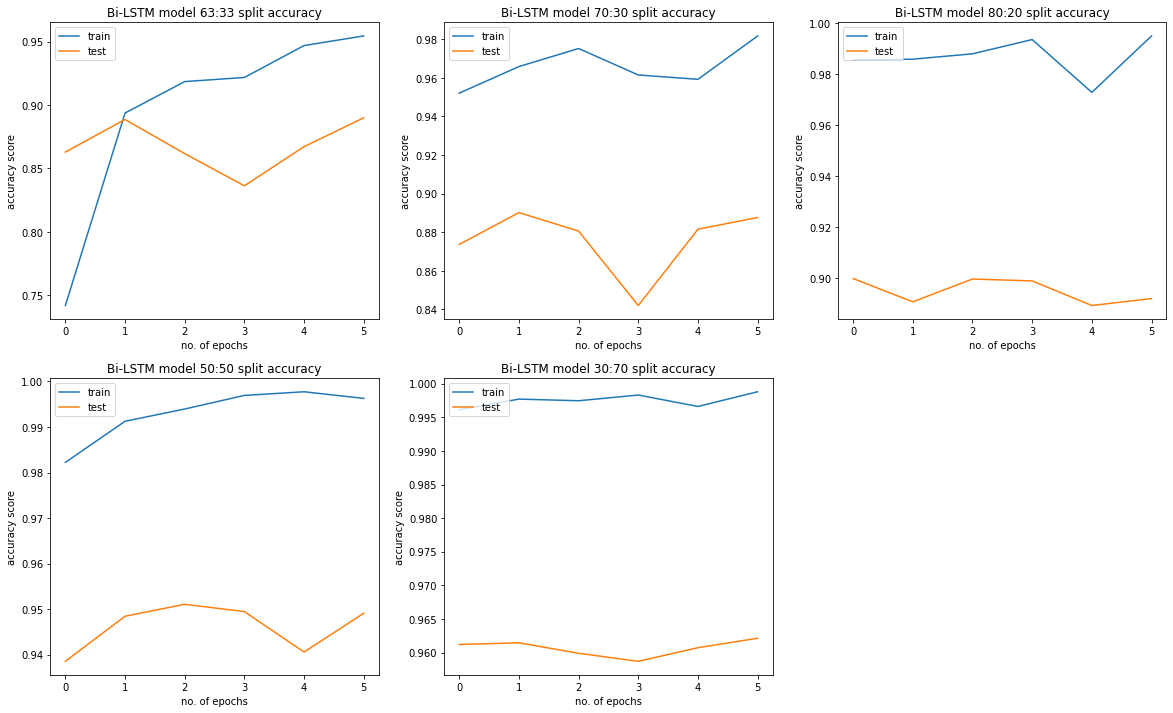

In [79]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Bi-LSTM model 63:33 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Bi-LSTM model 70:30 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 3)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Bi-LSTM model 80:20 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 4)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Bi-LSTM model 50:50 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 5)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Bi-LSTM model 30:70 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

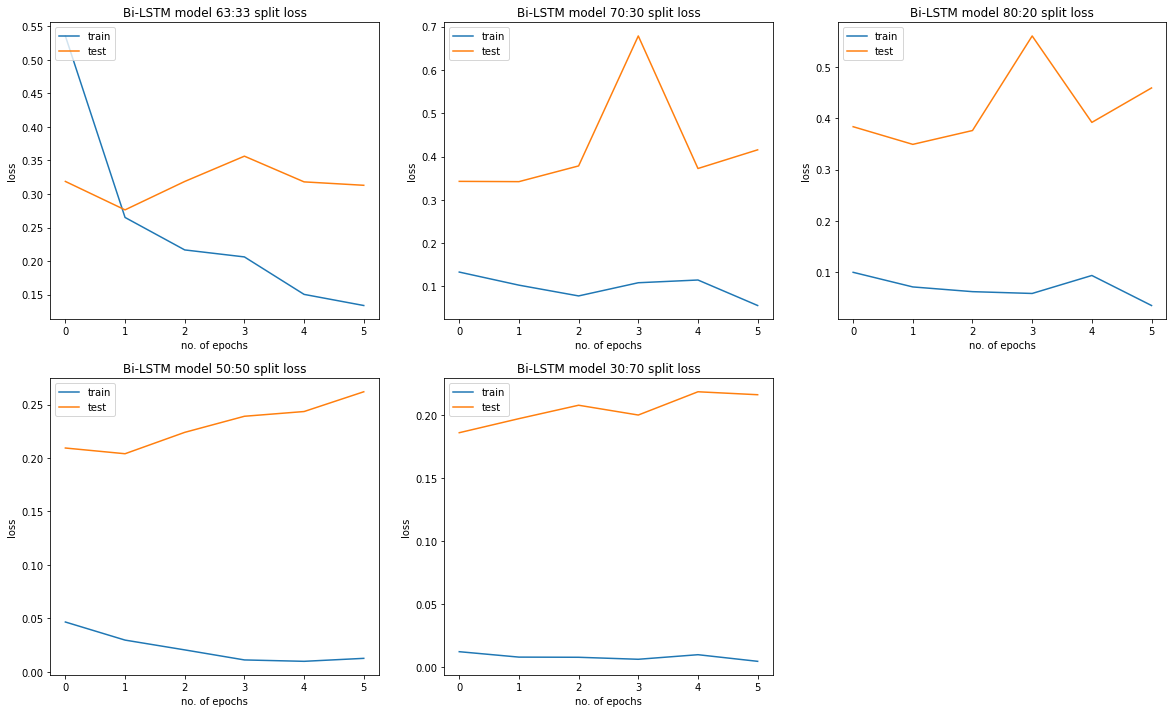

In [67]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Bi-LSTM model 63:33 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Bi-LSTM model 70:30 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 3)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Bi-LSTM model 80:20 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 4)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Bi-LSTM model 50:50 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 5)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Bi-LSTM model 30:70 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.show()